## Funciones de distribución de probabilidades


### Distribución Uniforme

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)

(array([100065., 100263., 100057.,  99893., 100267., 100309.,  99541.,
         99783.,  99694., 100128.]),
 array([ 1.00021925, 10.90019087, 20.80016249, 30.7001341 , 40.60010572,
        50.50007733, 60.40004895, 70.30002057, 80.19999218, 90.0999638 ,
        99.99993542]),
 <BarContainer object of 10 artists>)

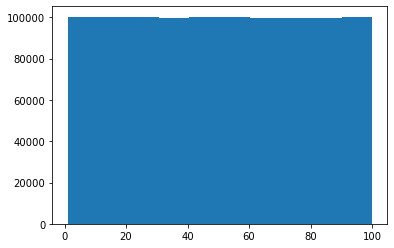

In [12]:
%matplotlib inline
plt.hist(data)

### Distribución Normal

In [16]:
data = np.random.randn(1000000)

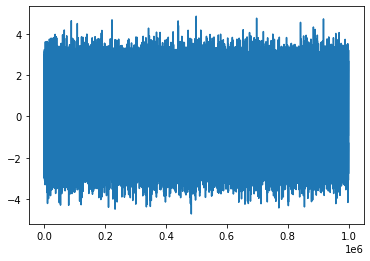

In [18]:
x = range(1, 1000001)
plt.plot(x, data)

(array([9.00000e+01, 2.43400e+03, 2.99910e+04, 1.54389e+05, 3.40997e+05,
        3.19876e+05, 1.28586e+05, 2.19980e+04, 1.60100e+03, 3.80000e+01]),
 array([-4.72146485, -3.76345242, -2.80543998, -1.84742755, -0.88941512,
         0.06859731,  1.02660974,  1.98462217,  2.9426346 ,  3.90064703,
         4.85865946]),
 <BarContainer object of 10 artists>)

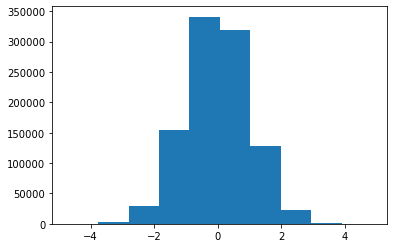

In [19]:
plt.hist(data)

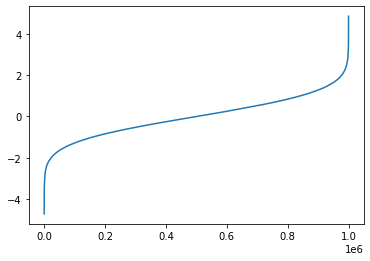

In [20]:
plt.plot(x, sorted(data))

(array([9.000e+00, 1.070e+02, 6.510e+02, 1.928e+03, 3.237e+03, 2.648e+03,
        1.153e+03, 2.440e+02, 2.100e+01, 2.000e+00]),
 array([-4.36785495, -2.27784584, -0.18783672,  1.90217239,  3.99218151,
         6.08219062,  8.17219973, 10.26220885, 12.35221796, 14.44222707,
        16.53223619]),
 <BarContainer object of 10 artists>)

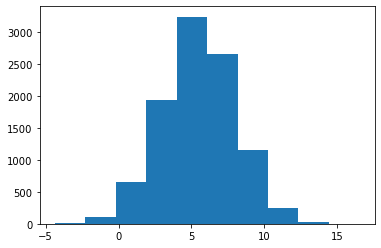

In [22]:
mu = 5.5
sd = 2.5
#data = 5.5 + 2.5*np.random.randn(10000) # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
z_10000 = np.random.randn(10000)
data = mu + sd * z_10000
plt.hist(data)

In [24]:
#le decimos que nos de 2 arreglos de 4 valores aleatorios
data = np.random.randn(2,4)
data

array([[-1.32923305e-02,  2.00487914e+00,  8.56213449e-01,
         2.22854608e-01],
       [-1.32264227e-03, -8.33343351e-02,  7.47650322e-01,
         6.02589331e-01]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si z < 1  estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.

In [30]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    n = 10000
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return(pi, fig)

3.1431799999999996


(3.1431799999999996, [<matplotlib.lines.Line2D at 0x19c681386a0>])

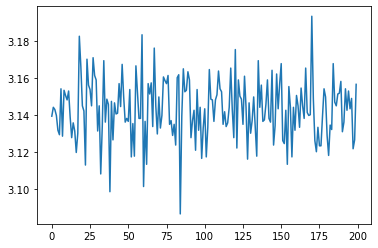

In [31]:
pi_montecarlo(10000,200)

### Dummy Data Sets

In [35]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 + np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [36]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000551,4.000169,18.500704
std,1.000386,0.999130,7.791214
min,-5.022242,-1.048246,5.000049
25%,-0.673646,3.326703,11.758441
50%,-0.000351,4.000728,18.502275
75%,0.675323,4.674988,25.247198
max,4.769017,8.481071,32.000000


(array([2.90000e+01, 1.07400e+03, 1.75510e+04, 1.16004e+05, 3.15205e+05,
        3.53204e+05, 1.63475e+05, 3.09380e+04, 2.44900e+03, 7.10000e+01]),
 array([-5.02224204, -4.04311613, -3.06399022, -2.08486431, -1.1057384 ,
        -0.12661249,  0.85251342,  1.83163933,  2.81076524,  3.78989115,
         4.76901706]),
 <BarContainer object of 10 artists>)

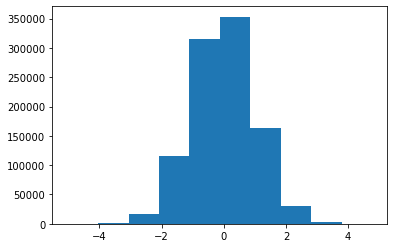

In [37]:
plt.hist(data["A"])

(array([1.90000e+01, 7.95000e+02, 1.34600e+04, 9.38260e+04, 2.80063e+05,
        3.60083e+05, 1.99618e+05, 4.72040e+04, 4.74600e+03, 1.86000e+02]),
 array([-1.04824557, -0.0953139 ,  0.85761777,  1.81054944,  2.76348111,
         3.71641278,  4.66934445,  5.62227612,  6.5752078 ,  7.52813947,
         8.48107114]),
 <BarContainer object of 10 artists>)

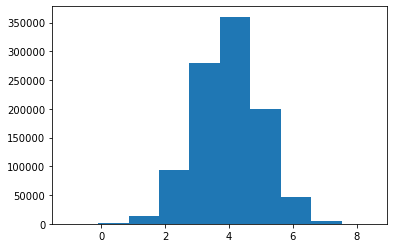

In [38]:
plt.hist(data["B"])

(array([ 99809., 100166.,  99995.,  99650., 100297., 100074., 100024.,
        100366.,  99515., 100104.]),
 array([ 5.00004853,  7.70004363, 10.40003874, 13.10003384, 15.80002894,
        18.50002404, 21.20001914, 23.90001424, 26.60000934, 29.30000444,
        31.99999954]),
 <BarContainer object of 10 artists>)

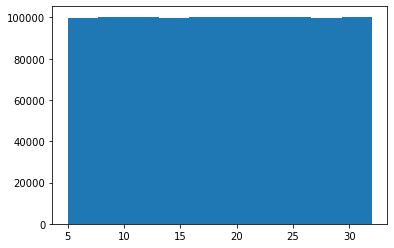

In [39]:
plt.hist(data["C"])

In [40]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [41]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [42]:
column_names = data.columns.values.tolist()

In [43]:
a = len(column_names)
a

21

In [47]:
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0, 1, a)
    }, index = range(42, 42 + a)
)

In [48]:
new_data

,Column Name,A,B
42,State,0.647899,0.506601
43,Account Length,0.495524,0.212291
44,Area Code,0.597921,0.301219
45,Phone,-0.875146,0.789695
46,Int'l Plan,-1.358811,0.000111
47,VMail Plan,-0.731606,0.192236
48,VMail Message,-0.245399,0.679905
49,Day Mins,0.161299,0.978912
50,Day Calls,-0.198809,0.956730
51,Day Charge,0.415859,0.000325
